In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
time_crop = 4000
time_crop1 = 2736
time_crop2 = 3051

# File loading from relative path
#file = '../../../Data/ISER2021/China-catabot-20201006.csv'
file = '../../../Data/ISER2021/China-catabot-20201006-gndspeed.csv'
# File loading from relative path
file2 = '../../../Data/ISER2021/China-catabot-20201006-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        #if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[6]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[31]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        #if current_time - initial_time <= time_crop:
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)

In [4]:
standardized_time2

[-1.2130250930786133]

### Compass heading

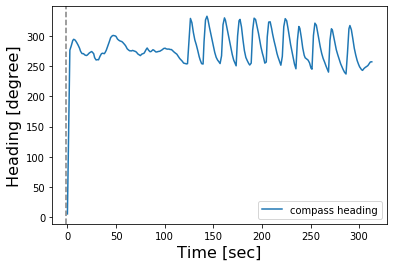

In [5]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

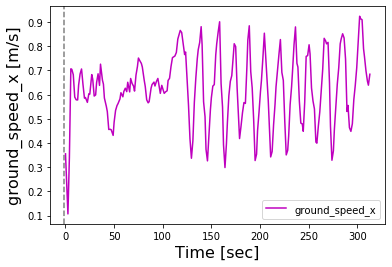

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_x [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed_x', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

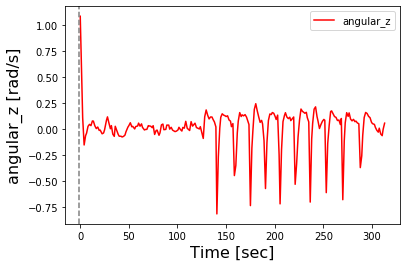

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

### Temperature

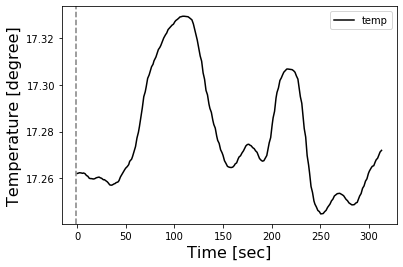

Standard Deviation of the temp is 0.02454441780051421 
Mean of the temp is 17.27760512675714 


In [8]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

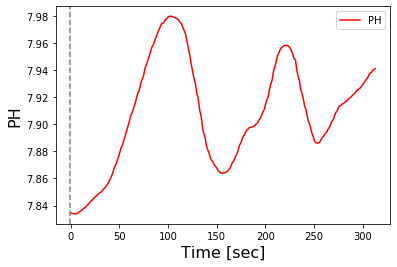

Standard Deviation of the temp is 0.03953329791562402 
Mean of the temp is 7.907170545070543 


In [9]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

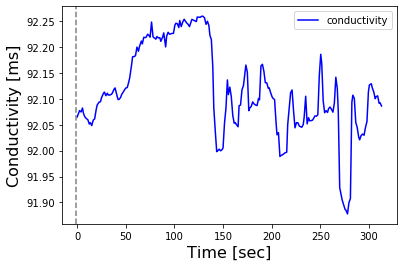

Standard Deviation of the chlorophyll is 0.08475321273695378 
Mean of the chlorophyll is 92.11139391977852 


In [10]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

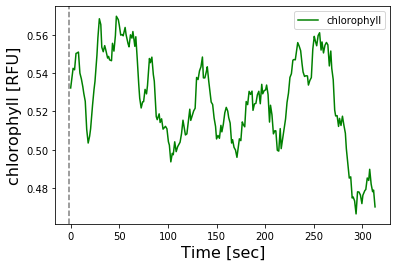

Standard Deviation of the chlorophyll is 0.024033800235323782 
Mean of the chlorophyll is 0.5258897430853012 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

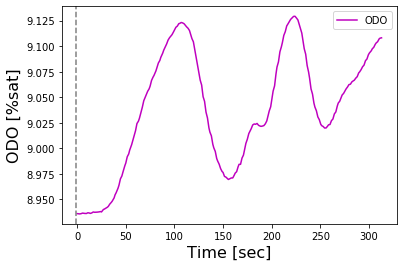

Standard Deviation of the DO is 0.05805572702874062 
Mean of the DO is 9.036947434101629 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

### Sonar depth

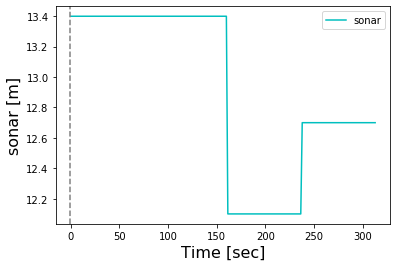

In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

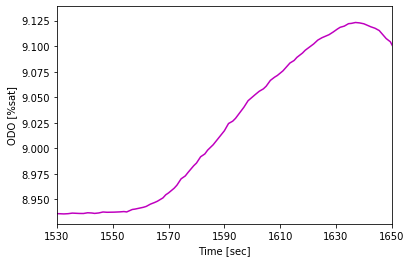

In [14]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('ODO [%sat]')
ax1.set_xlim([0,120])
ax1.plot(standardized_time, ODO, label='ODO', color='m')
#ax1.legend()

for wp in standardized_time2:
    if wp == standardized_time2[0]:
        plt.axvline(x=wp, color='gray', linestyle='--')
    else:
        plt.axvline(x=wp, color='orange', linestyle='--')
        
ax1.set_xticklabels(['1530', '1550', '1570', '1590', '1610', '1630', '1650', '1670'])
plt.show()